<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/intro_du_sampling_and_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving spotify_2000_2020.feather to spotify_2000_2020.feather


In [ ]:
 spotify_population = pd.read_feather('/content/spotify_2000_2020.feather')
 print(spotify_population.head())

   acousticness          artists  danceability  duration_ms  duration_minutes  \
0       0.97200  ['David Bauer']         0.567     313293.0          5.221550   
1       0.32100   ['Etta James']         0.821     360240.0          6.004000   
2       0.00659    ['Quasimoto']         0.706     202507.0          3.375117   
3       0.00390  ['Millencolin']         0.368     173360.0          2.889333   
4       0.12200   ['Steve Chou']         0.501     344200.0          5.736667   

   energy  explicit                      id  instrumentalness   key  liveness  \
0   0.227       0.0  0w0D8H1ubRerCXHWYJkinO          0.601000  10.0     0.110   
1   0.418       0.0  4JVeqfE2tpi7Pv63LJZtPh          0.000372   9.0     0.222   
2   0.602       1.0  5pxtdhLAi0RTh1gNqhGMNA          0.000138  11.0     0.400   
3   0.977       0.0  3jRsoe4Vkxa4BMYqGHX8L0          0.000000  11.0     0.350   
4   0.511       0.0  4mronxcllhfyhBRqyZi8kU          0.000000   7.0     0.279   

   loudness  mode         

In [ ]:
spotify_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41656 entries, 0 to 41655
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      41656 non-null  float64
 1   artists           41656 non-null  object 
 2   danceability      41656 non-null  float64
 3   duration_ms       41656 non-null  float64
 4   duration_minutes  41656 non-null  float64
 5   energy            41656 non-null  float64
 6   explicit          41656 non-null  float64
 7   id                41656 non-null  object 
 8   instrumentalness  41656 non-null  float64
 9   key               41656 non-null  float64
 10  liveness          41656 non-null  float64
 11  loudness          41656 non-null  float64
 12  mode              41656 non-null  float64
 13  name              41656 non-null  object 
 14  popularity        41656 non-null  float64
 15  release_date      41656 non-null  object 
 16  speechiness       41656 non-null  float6

In [ ]:
spotify_population.describe

<bound method NDFrame.describe of        acousticness                             artists  danceability  \
0           0.97200                     ['David Bauer']         0.567   
1           0.32100                      ['Etta James']         0.821   
2           0.00659                       ['Quasimoto']         0.706   
3           0.00390                     ['Millencolin']         0.368   
4           0.12200                      ['Steve Chou']         0.501   
...             ...                                 ...           ...   
41651       0.17300              ['DripReport', 'Tyga']         0.875   
41652       0.01670  ['Leon Bridges', 'Terrace Martin']         0.719   
41653       0.53800               ['Kygo', 'Oh Wonder']         0.514   
41654       0.07140       ['Cash Cash', 'Andy Grammer']         0.646   
41655       0.10900                  ['Ingrid Andress']         0.512   

       duration_ms  duration_minutes  energy  explicit  \
0         313293.0          5.2

In [ ]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

       acousticness                       artists  danceability  duration_ms  \
724        0.051900            ['Hannah Montana']        0.6280     188467.0   
37196      0.162000             ['Morgan Wallen']        0.6160     199840.0   
22144      0.004460  ['Katy Perry', 'Snoop Dogg']        0.7910     234653.0   
38346      0.154000         ['Montez de Durango']        0.7460     171311.0   
994        0.866000      ['Jónsi', 'Alex Somers']        0.0637     560653.0   
...             ...                           ...           ...          ...   
10044      0.119000    ['A Boogie Wit da Hoodie']        0.8700     186456.0   
25697      0.044800        ['South Park Mexican']        0.8420     344960.0   
1432       0.180000             ['August Alsina']        0.4760     277827.0   
8772       0.000506            ['The Mars Volta']        0.3080     425960.0   
26984      0.038800    ['YNW Melly', '9lokknine']        0.9320     176640.0   

       duration_minutes  energy  explic

In [ ]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop =spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.8300350499999998


the mean song duration in the sample is similar, but not identical to the mean song duration in the whole population.

In [ ]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']
print(loudness_pop.describe)

<bound method NDFrame.describe of 0       -13.441
1        -9.841
2        -8.306
3        -2.757
4        -9.836
          ...  
41651    -7.461
41652   -10.907
41653    -9.332
41654    -2.557
41655    -7.387
Name: loudness, Length: 41656, dtype: float64>


In [ ]:
# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

print(loudness_samp)

38322    -2.298
9930     -6.972
9155    -13.078
16546    -3.665
2959    -11.913
          ...  
38155    -2.622
31426   -11.126
10211    -5.803
28724    -7.667
23345    -3.726
Name: loudness, Length: 100, dtype: float64


In [ ]:
import numpy as np

In [ ]:
# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.43399


the calculated value (the mean) is close but not identical in each case

In [ ]:
import matplotlib.pyplot as plt

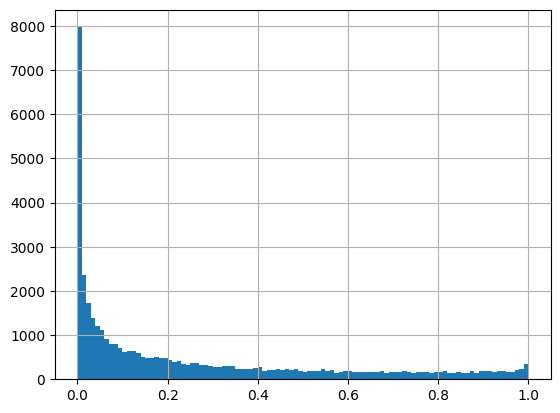

In [ ]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

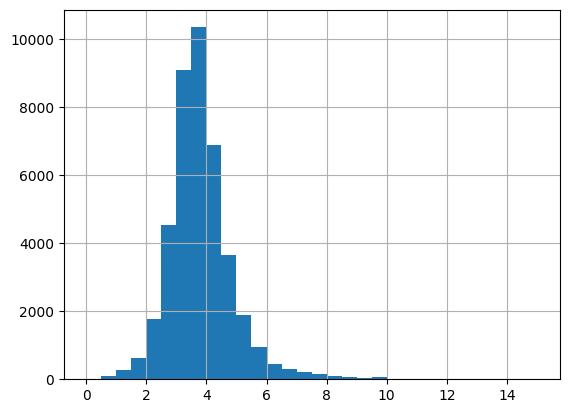

In [ ]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0,15.5,0.5))
plt.show()

The duration values in the sample show a similar distribution to those in the whole population, so the results are generalizable.

Generate 5000 numbers from a uniform distribution, setting the parameters low to -3 and high to 3

In [ ]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3,high=3,size=5000)

# Print uniforms
print(uniforms)

[-0.13610196 -1.3746853   2.70162562 ... -0.73018921 -2.76165987
  0.68401019]


Generate 5000 numbers from a normal distribution, setting the parameters loc to 5 and scale to 2.

In [ ]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

[2.62472437 3.72693626 5.45478625 ... 4.96857266 6.31544539 5.01861074]


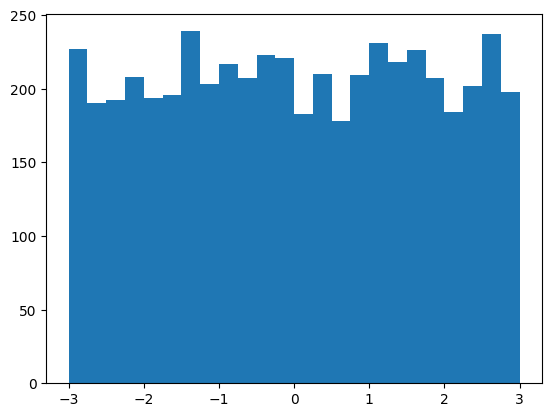

In [ ]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

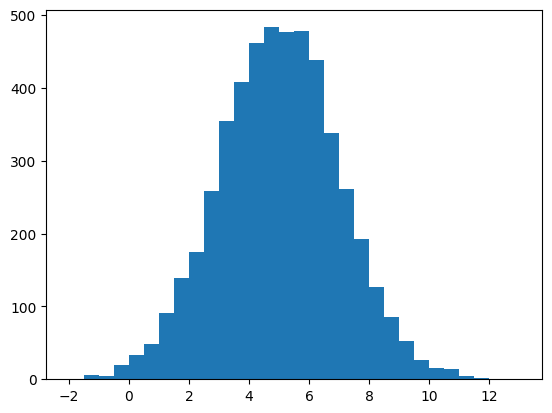

In [ ]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals,bins=np.arange(-2,13.5,0.5))
plt.show()

the histograms almost take the flat and bell curve shapes of the uniform and normal distributions, but there is a bit of random noise.

# **Chap 4 : Bootstrap distributions**

In [ ]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1,replace=True)

# Print the resample
print(spotify_1_resample)

       acousticness                           artists  danceability  \
32860      0.000048             ['A Day To Remember']         0.409   
11978      0.645000                     ['Liza Anne']         0.437   
4167       0.611000               ['Parker McCollum']         0.486   
7734       0.119000  ['Teyana Taylor', 'Chris Brown']         0.597   
13960      0.015500                 ['Macross 82-99']         0.559   
...             ...                               ...           ...   
17911      0.009990          ['Tyler James Williams']         0.625   
22285      0.056100                  ['Taylor Swift']         0.648   
35147      0.056700                       ['Big Boi']         0.849   
8655       0.459000               ['Banda Cuisillos']         0.560   
28805      0.083700                     ['Ayo & Teo']         0.804   

       duration_ms  duration_minutes  energy  explicit  \
32860     200677.0          3.344617   0.992       0.0   
11978     219000.0          3.6

In [ ]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5937251


In [ ]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Print the result
print(mean_danceability_1000)

[0.5987085, 0.6033723999999999, 0.5922314000000001, 0.5915064, 0.5861961000000001, 0.5914777000000001, 0.5914557, 0.5994717, 0.5971642999999999, 0.5925969999999999, 0.59884, 0.5886233999999999, 0.5897718, 0.5977374, 0.5984547, 0.5937655000000001, 0.5943278000000001, 0.5796866, 0.5860650000000001, 0.5948435999999999, 0.6031429999999999, 0.5889474, 0.5949332, 0.5959975, 0.5960475000000001, 0.5833073, 0.598259, 0.5895661999999999, 0.5893160000000001, 0.5939727, 0.598052, 0.592263, 0.6049473000000001, 0.6029580999999999, 0.5962205, 0.5974226000000001, 0.5899167, 0.6020391999999999, 0.5947820999999999, 0.5998791, 0.5923144, 0.5983197, 0.6023077, 0.5903927, 0.5853273999999999, 0.5942454, 0.5958853000000001, 0.5860277, 0.6001512999999999, 0.5963280999999999, 0.5980553, 0.5917555, 0.5968906999999999, 0.5860227, 0.5940059999999999, 0.5911004000000001, 0.6076521, 0.5937391, 0.598191, 0.5964350999999999, 0.5957467, 0.5937937, 0.5940926999999999, 0.5898612000000001, 0.5912107, 0.5928087999999999, 

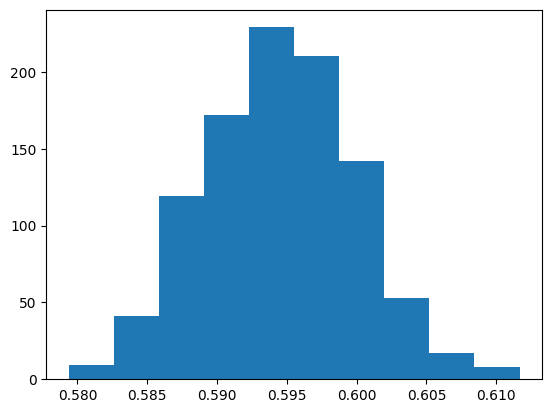

In [ ]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is.

In [ ]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity
    	np.mean(spotify_population.sample(n=500,replace=False)['popularity'])
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)

[54.764, 54.492, 55.8, 53.83, 54.64, 54.444, 54.75, 54.566, 54.496, 54.238, 55.062, 54.844, 56.078, 54.546, 55.378, 54.52, 54.166, 54.206, 54.826, 53.884, 55.122, 54.72, 55.108, 54.986, 54.088, 54.908, 54.97, 55.438, 54.71, 54.604, 55.14, 54.566, 55.026, 55.426, 55.138, 55.98, 54.93, 54.952, 55.662, 54.776, 55.68, 54.846, 55.418, 55.314, 54.818, 55.23, 54.672, 54.4, 53.538, 54.766, 55.366, 55.118, 54.28, 55.842, 55.468, 54.43, 53.754, 55.448, 55.16, 54.4, 54.978, 55.442, 54.45, 55.152, 55.09, 54.644, 54.698, 55.086, 55.054, 55.316, 54.376, 54.898, 55.332, 54.434, 54.884, 54.396, 55.208, 55.47, 54.894, 54.22, 55.452, 55.446, 55.526, 55.074, 54.926, 55.618, 55.162, 55.16, 54.81, 54.524, 55.068, 54.904, 55.286, 54.876, 54.956, 54.638, 54.828, 54.71, 54.764, 54.902, 54.754, 55.042, 55.088, 54.49, 55.092, 54.696, 54.89, 54.894, 54.974, 55.08, 55.288, 54.312, 55.09, 54.414, 55.61, 54.534, 55.202, 54.828, 55.236, 53.83, 54.438, 55.428, 54.986, 55.046, 55.752, 54.108, 53.966, 54.814, 54.882, 5

In [ ]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity
    	spotify_sample.sample(n=500, replace=True)['popularity'].mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[54.734, 55.568, 54.31, 54.074, 55.536, 54.254, 55.162, 54.978, 55.062, 55.538, 54.712, 54.754, 55.554, 55.142, 54.486, 54.95, 55.46, 54.062, 54.374, 54.476, 54.698, 54.742, 55.096, 55.22, 55.002, 54.824, 55.032, 54.854, 54.786, 55.182, 54.042, 54.086, 54.924, 54.816, 55.106, 54.414, 54.594, 54.602, 54.426, 54.616, 54.958, 54.764, 54.5, 55.38, 55.102, 54.778, 54.458, 55.636, 54.834, 54.076, 54.604, 54.474, 54.108, 55.798, 55.06, 55.18, 54.746, 55.196, 54.274, 55.528, 54.536, 53.62, 54.782, 54.668, 54.796, 55.534, 54.546, 55.31, 54.718, 55.568, 54.668, 54.242, 54.704, 55.218, 55.576, 54.634, 54.69, 54.276, 55.148, 53.976, 54.084, 54.816, 54.534, 55.004, 54.52, 54.614, 54.76, 54.238, 53.824, 54.896, 55.506, 54.642, 54.552, 54.9, 54.262, 54.54, 55.146, 55.478, 54.544, 55.272, 55.444, 55.13, 54.882, 55.382, 55.102, 54.874, 55.248, 54.944, 54.088, 54.45, 54.862, 54.96, 55.134, 55.558, 54.486, 54.926, 55.194, 54.34, 54.538, 54.826, 54.168, 54.512, 54.37, 55.3, 54.686, 54.792, 53.8, 54.974, 5

The sampling distribution and bootstrap distribution are closely related

In [ ]:
sampling_distribution = mean_popularity_2000_samp
bootstrap_distribution = mean_popularity_2000_boot

In [ ]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean =np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.795, 54.855675000000005, 54.798052000000006]


The sampling distribution mean can be used to estimate the population mean, but that is not the case with the bootstrap distribution.

In [ ]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution, ddof=1) * np.sqrt(500)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof=1) * np.sqrt(500)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257536, 11.41942986222948, 10.98969311968867, 11.337729874509874]


This is an important property of the bootstrap distribution. When you don't have all the values from the population or the ability to sample multiple times, you can use bootstrapping to get a good estimate of the population standard deviation.

## **Calculating confidence intervals**

In [ ]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution,0.025)
upper_quant = np.quantile(bootstrap_distribution,0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(53.786, 55.77805)


In [ ]:
from scipy.stats import norm

In [ ]:
# Find the mean and std dev of the bootstrap distribution
point_estimate =np.mean(bootstrap_distribution)
standard_error =np.std(bootstrap_distribution,ddof=1)
# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025,loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975,loc=point_estimate, scale=standard_error)


# Print standard error method confidence interval
print((lower_se, upper_se))

(53.80427442060237, 55.79182957939764)


The standard error method for calculating the confidence interval assumes that the bootstrap distribution is normal.